# Plotting the Benchmark Results
This notebook is used to plot the benchmark results. The notebook assumes that the result files were created via `shapiq`s benchmarking functionality.

In [5]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

from shapiq.games.benchmark.plot import plot_approximation_quality, add_legend

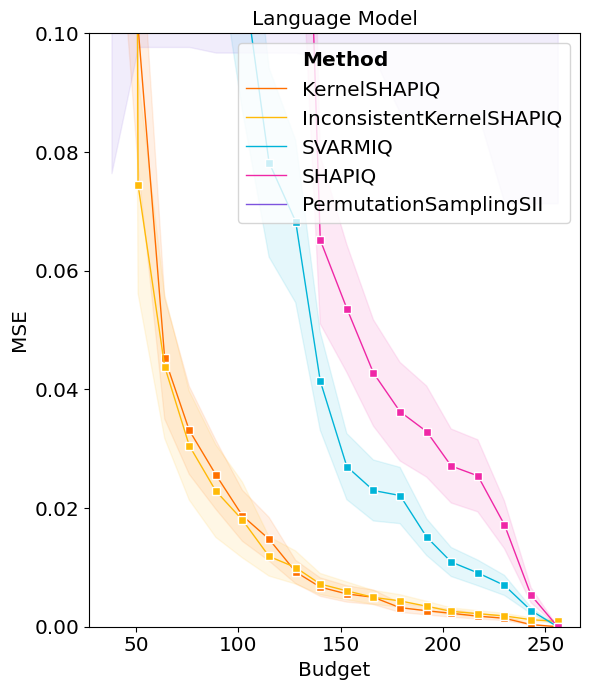

In [11]:
data_path = "results.csv"
save_path = None  # i.e. "plot.pdf"

# parameters for the plot  ---------------------------------------------------------------------
# title of the plot
title = "Language Model"
# a list of approximators to plot (in that order)
approximators_to_plot = [
    "KernelSHAPIQ",
    "InconsistentKernelSHAPIQ",
    "SVARMIQ",
    "SHAPIQ",
    "PermutationSamplingSII",
]
# a list of orders to plot (in that order)
orders_to_plot = [2]  # can be "all" or 1, 2, 3, etc.
# the metric to plot (can be "MSE", "MAE", "Precision@10"/"@5", "KendallTau", "KendallTau@10")
metric = "MSE"
# denotes weather to plot the legend or not
plot_legend = True
# ylim of the plot
ylim = (0, 0.1)  # (0, 3.65e-3)  # can be None or a tuple of (min, max) or None
# make y-axis log scale
log_scale = False
scientific_notation = False
# matplotlib parameters
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (6, 7),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
plt.rcParams.update(params)

# make the plot --------------------------------------------------------------------------------

data = pd.read_csv(data_path)

fig, ax = plot_approximation_quality(
    data, metric=metric, approximators=approximators_to_plot, orders=orders_to_plot
)

# add the legend
if plot_legend:
    add_legend(ax, approximators=approximators_to_plot)

ax.set_xlabel("Budget")
ax.set_ylabel(metric)

ax.set_title(title)
if log_scale:
    ax.set_yscale("log")
    ax.set_ylabel(metric + " (log scale)")
elif scientific_notation:
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
else:
    ax.set_ylim(ylim)
plt.tight_layout()

if save_path is not None:
    plt.savefig(save_path)

plt.show()